In [3]:
import matplotlib.pyplot as plt
import torch
import numpy 

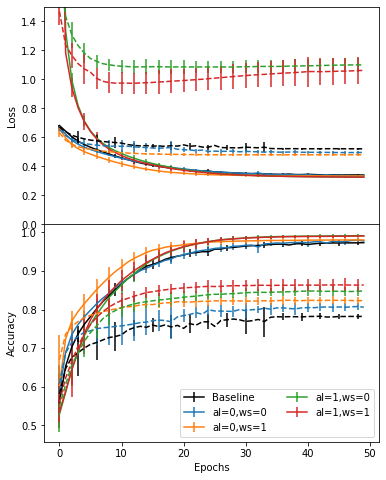

In [4]:
linestyles = ['-', '--']
x = range(50)
fig, ax = plt.subplots(2, 1, figsize=(6,8), sharex=True)
for i, set_ in enumerate(['train', 'val']):
    
    for j, metric in enumerate(['loss', 'acc']):
        ax[j].set_prop_cycle(None)
        label = f"Baseline" if not i else ""
        baseline = torch.load(f"../results/convnet/data/ensemble_{set_}_{metric}-baseline.pkl")
        ax[j].errorbar(x, baseline.mean(axis=0), yerr=baseline.std(axis=0), ls=linestyles[i], c='k', errorevery=3, label=label)
        for k, aux_loss in enumerate([0, 1]):
            for l, weight_share in enumerate([0, 1]):
                data = torch.load(f"../results/convnet/data/ensemble_{set_}_{metric}-al{aux_loss}-ws{weight_share}.pkl")
                label = f"al={aux_loss},ws={weight_share}" if not i else ""
                ax[j].errorbar(x, data.mean(axis=0), yerr=data.std(axis=0) ,ls=linestyles[i], label=label, errorevery=2)
    
ax[0].set_ylim(0,1.5)
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
fig.subplots_adjust(hspace=0)
ax[1].legend(ncol=2)
fig.savefig("../results/convnet/plots/learning_curves_all.png", dpi=200, bbox_inches='tight')

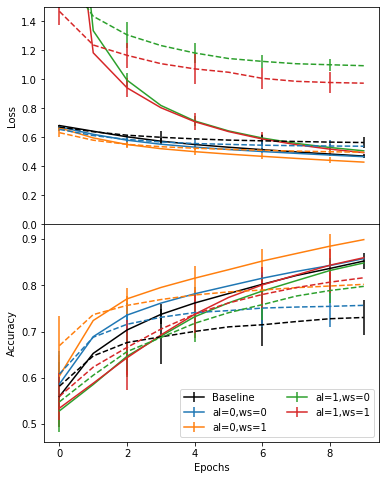

In [15]:
linestyles = ['-', '--']
x = range(10)
fig, ax = plt.subplots(2, 1, figsize=(6,8), sharex=True)
for i, set_ in enumerate(['train', 'val']):
    
    for j, metric in enumerate(['loss', 'acc']):
        ax[j].set_prop_cycle(None)
        label = f"Baseline" if not i else ""
        baseline = torch.load(f"../results/convnet/data/ensemble_{set_}_{metric}-baseline.pkl")
        ax[j].errorbar(x, baseline.mean(axis=0)[:10], yerr=baseline.std(axis=0)[:10], ls=linestyles[i], c='k', errorevery=3, label=label)
        for k, aux_loss in enumerate([0, 1]):
            for l, weight_share in enumerate([0, 1]):
                data = torch.load(f"../results/convnet/data/ensemble_{set_}_{metric}-al{aux_loss}-ws{weight_share}.pkl")
                label = f"al={aux_loss},ws={weight_share}" if not i else ""
                ax[j].errorbar(x, data.mean(axis=0)[:10], yerr=data.std(axis=0)[:10] ,ls=linestyles[i], label=label, errorevery=2)
    
ax[0].set_ylim(0,1.5)
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
fig.subplots_adjust(hspace=0)
ax[1].legend(ncol=2)
fig.savefig("../results/convnet/plots/learning_curves_all_start.png", dpi=200, bbox_inches='tight')

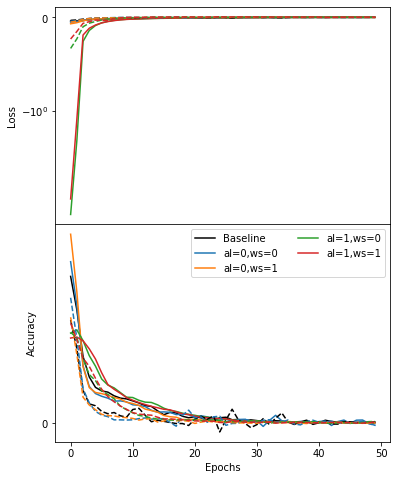

In [23]:
linestyles = ['-', '--']
x = range(50)
fig, ax = plt.subplots(2, 1, figsize=(6,8), sharex=True)
for i, set_ in enumerate(['train', 'val']):
    
    for j, metric in enumerate(['loss', 'acc']):
        ax[j].set_prop_cycle(None)
        label = f"Baseline" if not i else ""
        baseline = torch.load(f"../results/convnet/data/ensemble_{set_}_{metric}-baseline.pkl")
        ax[j].errorbar(x, np.gradient(baseline.mean(axis=0).numpy()), yerr=None, ls=linestyles[i], c='k', errorevery=3, label=label)
        for k, aux_loss in enumerate([0, 1]):
            for l, weight_share in enumerate([0, 1]):
                data = torch.load(f"../results/convnet/data/ensemble_{set_}_{metric}-al{aux_loss}-ws{weight_share}.pkl")
                label = f"al={aux_loss},ws={weight_share}" if not i else ""
                ax[j].errorbar(x, np.gradient(data.mean(axis=0).numpy()), yerr=None ,ls=linestyles[i], label=label, errorevery=2)
    
#ax[0].set_ylim(0,1.5)
ax[0].set_ylabel('Loss Convergence Rate')
ax[0].set_yscale('symlog')
ax[1].set_yscale('symlog')
ax[1].set_ylabel('Accuracy Convergence Rate')
ax[1].set_xlabel('Epochs')

fig.subplots_adjust(hspace=0)
ax[1].legend(ncol=2)
fig.savefig("../results/convnet/plots/grad_learning_curves_all.png", dpi=200, bbox_inches='tight')